# Blend Boosting study on Coursera dataset of the Predict Future Sales:

Here I share with you a systematic blend boosting study on Coursera dataset of the Predict Future Sales. (https://www.kaggle.com/c/competitive-data-science-predict-future-sales/). I just collect some submission files on the kaggle.

Basically, I start to analysis of correlations, then decide to sort them according to their sum of correlation values in between. This lets me divide ~10 scores into 4 subgroups. Then I make internal linear calibration in each subgroup by considering their scores on the Kaggle. Finally I make recalling between subgroups to achieve higher scores on the Kaggle by resubmission. Due to daily limitation about number of submission, I am able to get this best result in my first four attempts (5th one is for notebook submission). Of course, if you spend much more time, you can always achieve betters scores, but it is already highest score on Kaggle ;-). In future I can submit much better results, and also plan to make a full model analysis on this dataset.

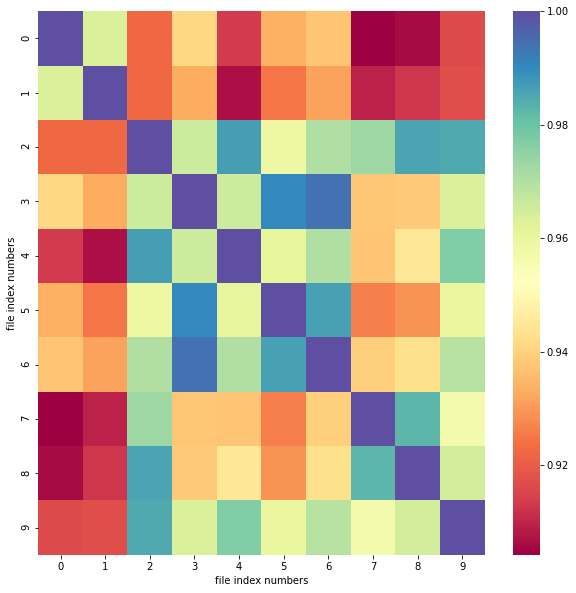

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading dummy submission file
sub_file = pd.read_csv('../input/best-blend/submission_blend_1.csv')

# loading data including 15 (some of them are identical) best scores
df_sub = pd.read_csv(r'../input/best-blend/best_blend_1.csv')
df_sub = df_sub.iloc[:, :10]

# a rough correlation based visualization of 32 best scores
plt.figure(figsize=(10,10))
sns.heatmap(df_sub.corr(), cmap='Spectral')
plt.ylabel('file index numbers')
plt.xlabel('file index numbers')
plt.show()

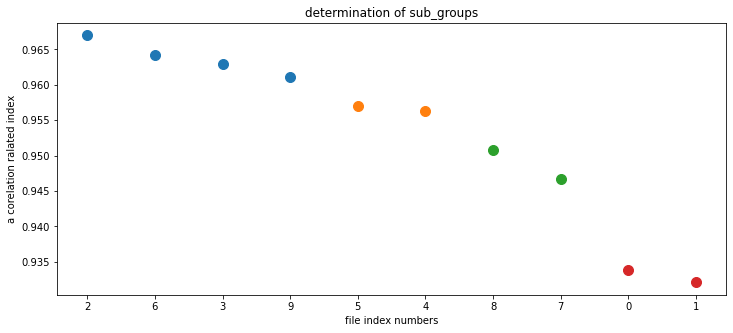

In [2]:
# basic analysis and visualization of subgroups in different color.
plt.figure(figsize=(12, 5))
df_mean_corr = pd.DataFrame({'mean_corr': df_sub.corr().mean()})
df_mean_corr = df_mean_corr.sort_values('mean_corr', ascending=False)
df_mean_corr = df_mean_corr.reset_index()

plt.plot(df_mean_corr.index[:4], df_mean_corr['mean_corr'].values[:4], 'o', ms=10)
plt.plot(df_mean_corr.index[4:6], df_mean_corr['mean_corr'].values[4:6], 'o', ms=10)
plt.plot(df_mean_corr.index[6:8], df_mean_corr['mean_corr'].values[6:8], 'o', ms=10)
plt.plot(df_mean_corr.index[8:], df_mean_corr['mean_corr'].values[8:], 'o', ms=10)

plt.xticks([*range(len(df_mean_corr))], df_mean_corr['index'].tolist())
plt.title('determination of sub_groups')
plt.ylabel('a corelation ralated index')
plt.xlabel('file index numbers')
plt.show()

In [3]:
# a linear combination to achieve much better scores
df_sub['weighted_avg'] = abs(1 * (
        10 * ( 5 * df_sub['2'] + 5 * df_sub['3'] + 2 * df_sub['6'] + 1 * df_sub['9'] ) / 13 +
        25 * ( 1 * df_sub['4'] + 1 * df_sub['5'] ) / 2 +
        2 * ( 2 * df_sub['7'] + 1 * df_sub['8'] ) / 3 +
        100 * ( 5 * df_sub['0'] + 1 * df_sub['1'] ) / 6
) / 137 )


# create the final submission file
submission = pd.DataFrame({'ID': sub_file.ID, 'item_cnt_month': df_sub['weighted_avg'].tolist()})
submission.to_csv(r'submission_blend_1.csv', index=False)

## It gets a 0.83386 as public score, and looks the best score on Kaggle so far ;-)